## Import Libraries

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import math
from sklearn.metrics import mean_squared_error
import torch
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import os



## Load and Check Data

In [2]:
data = pd.read_csv("./data/tsla.us.txt")

In [3]:
#Let's examine a few examples from our data.
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [4]:
print("Data Shape -->", data.shape)

Data Shape --> (1858, 7)


In [5]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03,1858.0
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06,0.0
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00,0.0
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06,0.0
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06,0.0
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06,0.0
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07,0.0


In [6]:
print("Do you have a null column? \n", data.isna().sum())

Do you have a null column? 
 Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


## Recurrent Neural Networks (RNN)


### Why Recurrent Neural Networks



- Cannot handle sequential data
- Takes into account the current entry.
- It does not consider previous entries, so it does not remember

The solution to these problems is RNN. RNN can process sequential data, accept existing input data and previously received inputs.RNNs can remember previous entries as they have internal memories.

## Data Preprocessing

In this section, we will make the data available for RNN.

- Split the data as train and test
- Normalize data.
- X_train - y_train
- Reshape

### Split the data as train and test

In this section, we will seperate the data set into two parts - training and testing.

In [7]:
training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

In [8]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


### Normalize data

In this section, we will normalize the data.

In [9]:
# the part of data that we will use as training.
train = train.loc[:, ["Open"]].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

### X_train - y_train

- We will separate the normalized data into x_train and y_train.
- We will make this distinction 40 steps 40 steps. So we will train in 40 steps. We will anticipate step 41. didn't we understand Let's examine the picture below and visualize this in our minds.


In [10]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1446, 40)

### Reshape

Why do we reshape?

- One of the most basic points to be considered in RNNs is that they want their input to have 3 dimensions.
- These 3 sizes are typically:
- the size of data we have
- Number of steps
- Number of features

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

X_train -->  (1446, 40, 1)
y_train shape -->  (1446,)


## Implementing with Keras

In this section, we create and fit RNN model.

- Create Model
- Compile Model
- Epochs and Batch Size
- Fit the model

### Create Model

- We are importing the libraries we will use for our model.
- Later, we will create our RNN model.

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [13]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [15]:
epochs = 100 
batch_size = 20

### Fit the model

In [16]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 17s 87ms/step - loss: 0.2566
Epoch 2/100
73/73 [==============================] - 6s 77ms/step - loss: 0.1508
Epoch 3/100
73/73 [==============================] - 3s 45ms/step - loss: 0.0751
Epoch 4/100
73/73 [==============================] - 3s 40ms/step - loss: 0.0546
Epoch 5/100
73/73 [==============================] - 3s 40ms/step - loss: 0.0459
Epoch 6/100
73/73 [==============================] - 4s 49ms/step - loss: 0.0320
Epoch 7/100
73/73 [==============================] - 4s 50ms/step - loss: 0.0280
Epoch 8/100
73/73 [==============================] - 3s 41ms/step - loss: 0.0237
Epoch 9/100
73/73 [==============================] - 3s 40ms/step - loss: 0.0202
Epoch 10/100
73/73 [==============================] - 4s 49ms/step - loss: 0.0195
Epoch 11/100
73/73 [==============================] - 4s 50ms/step - loss: 0.0150
Epoch 12/100
73/73 [==============================] - 3s 40ms/step - loss: 0.0137
Epoch 13/100
73/73 [====

### Predict

We will make predictions using the model we have created.

In [17]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


We use the data we separated above as our test data.

In [18]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape --> ", real_price.shape)

Real Price Shape -->  (372, 1)


Since we use the "open" feature while training the model, we will use the same feature while testing.

In [19]:
dataset_total = pd.concat((data["Open"], test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

We distinguish the values that I will guess.

In [20]:
X_test = []

for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

print("X_test shape --> ", X_test.shape)

X_test shape -->  (372, 40)


We trained our model according to the steps above. We generate our test data based on this number of steps.

And also we use RMSE method to compare the training and testing result.

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0], 1))


In [24]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)

In [25]:
y_train.size(),X_train.size()

(torch.Size([1446, 1]), torch.Size([1446, 40]))

In [26]:
X_train = scaler.inverse_transform(X_train.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
X_train.shape

(1446, 40)

In [27]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)

12/12 [==============================] - 2s 42ms/step


In [28]:
trainScore = math.sqrt(mean_squared_error(X_train[:,0], y_train[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(predict[:,0], real_price[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 29.06 RMSE
Test Score: 41.09 RMSE


### Evaluate the model

Finally let's take a look at our results by comparing our predictions with real data.

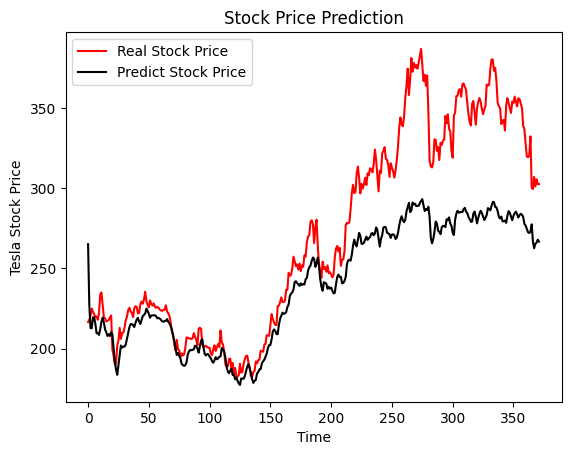

In [29]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

Our model has made good predictions until a certain time, but after a while the difference with the real data has started to increase.